# Python implementation of Kernel Current Source Density (kCSD) method
Kernel Current Source Density (kCSD) method, a technique used in neuroscience for estimating the distribution of current sources in the brain based on recorded electrical potentials. 

In [44]:
%load_ext autoreload
%autoreload 2

from ipywidgets import interact
import numpy as np
import config

import plotting_helpers as plots
from widget_helpers import dim_select, csd_select, kcsd_select, accordion, nr_ele_select, nr_broken_ele, noise_select, regularization_select

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Select dimensions of your setup

In [45]:
dim_select

ToggleButtons(description='Dimensions of the setup:', index=1, options=('1D', '2D', '3D'), tooltips=('Laminar …

### Select a type of CSD source

In [46]:
csd_select

ToggleButtons(description='True source type', options=('quadpole small', 'dipole large'), value='quadpole smal…

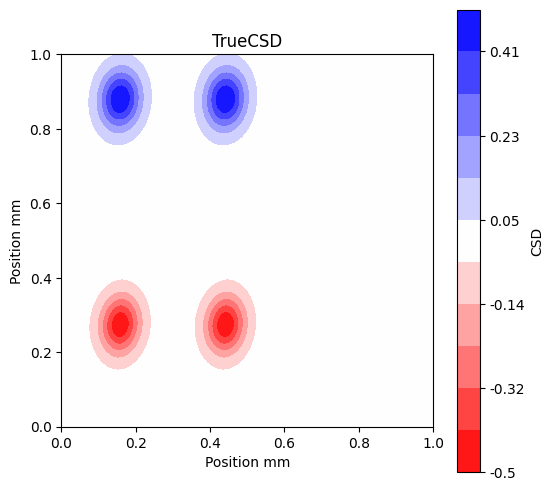

In [47]:
val = config.ValidateKCSD(dim=int(dim_select.value[0]))
csd_seed = 5
csd_at, true_csd = val.generate_csd(config.csd_profile, csd_seed=csd_seed)
plots.show_csd(csd_at, true_csd)

### Select number of electrodes

In [48]:
nr_ele_select

BoundedIntText(value=9, description='Select nr of electrodes:', max=200, min=1)

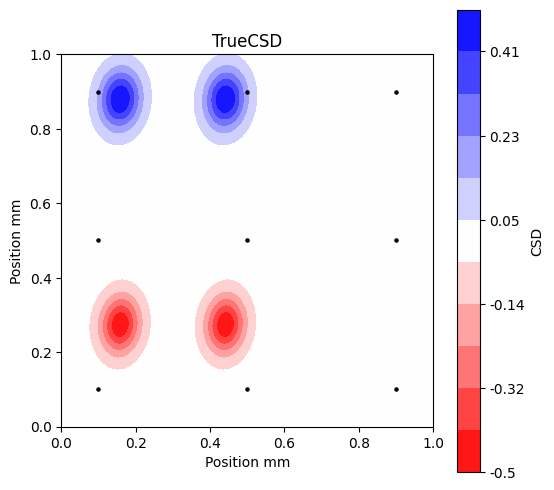

In [49]:
ele_pos = val.generate_electrodes(total_ele=nr_ele_select.value, ele_lims=[0.1, 0.9])
plots.show_csd(csd_at, true_csd, show_ele=ele_pos)

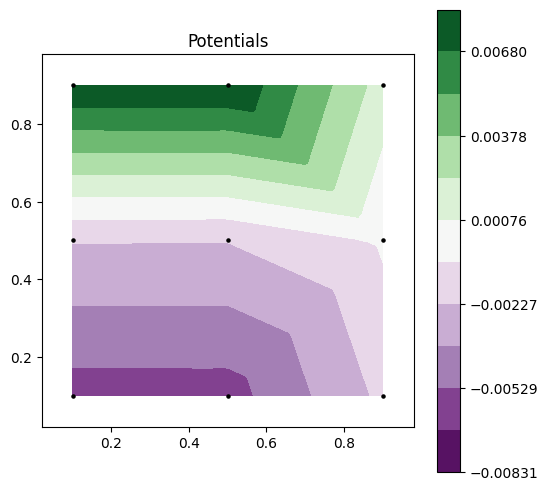

In [50]:
h = 0.25
sigma = 0.3
pots = val.calculate_potential(true_csd, csd_at, ele_pos, h, sigma)
plots.show_pot(ele_pos, pots)

### Do you want to investigate data with noise or without?

In [51]:
noise_select

FloatSlider(value=12.4, continuous_update=False, description='Noise level [%]:', readout_format='.1f')

In [52]:
if noise_select.value > 0:
    pots = val.add_noise(pots, level=noise_select.value)

In [53]:
kcsd_select

ToggleButtons(description='KCSD method', options=('ValidateKCSD2D', 'ValidateMoIKCSD'), value='ValidateKCSD2D'…

### Call the main class with parameters of ground truth data and measurement setup
Do you want to investigate data with noise or without?

In [54]:
k = config.kCSD(csd_seed, **config.defaults[config.kCSD.__name__])

### Choose regularization method: cross-validation or L-curve

In [55]:
regularization_select

Select(description='Regularization method:', index=1, options=('cross-validation', 'L-curve'), value='L-curve'…

### Estimate current source density, change value of Rs to fit the best solution using crossvalidation

No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2


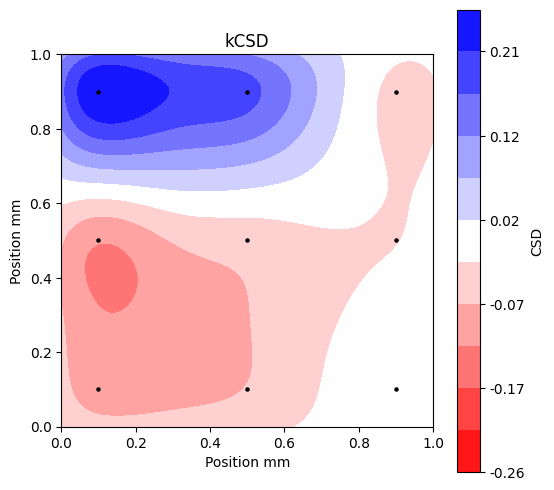

In [56]:
obj, est_csd = k.do_kcsd(pots, ele_pos, method=regularization_select.value, Rs=np.arange(0.2, 0.5, 0.1))
plots.show_csd(obj.estm_pos, est_csd, show_ele=ele_pos, show_kcsd=True)

### Choose regularization method: cross-validation or L-curve# Investigate spectral structure of kCSD reconstruction

In [57]:
structure = config.SpectralStructure(obj)

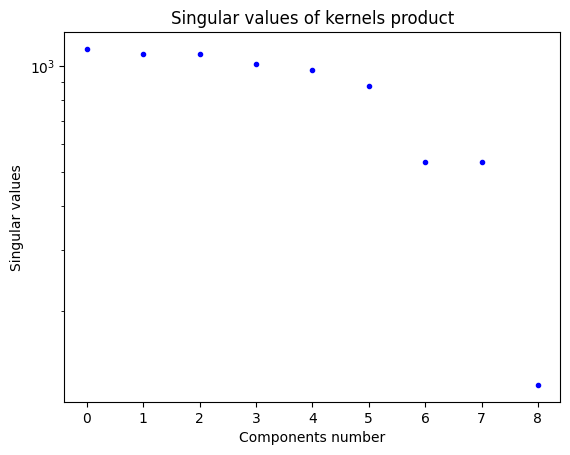

In [58]:
u_svd, sigma, v_svd = structure.svd()

Visibility maps
------

In [59]:
vmap = config.visibility_map(total_ele=nr_ele_select.value, **config.defaults[config.kCSD.__name__])

#### Calculate errors for Visibility Map

It may take a few minutes.

In [60]:
# n - number of (pseudo) random sources included in calculation of error map 

rms, point_error = vmap.calculate_error_map(config.csd_profile,
                                            n=100, Rs=np.arange(0.2, 0.5, 0.1), method=regularization_select.value)

Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 

min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max l

min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max l

min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max lambda 0.0084
l-curve (all lambda):  0.4
Best lambda and R =  0.00099579626695735 ,  0.2
Number of electrodes: 9
No lambda given, using defaults
min lambda 0.001
max lambda 0.0087
min lambda 0.001
max lambda 0.0087
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0086
l-curve (all lambda):  0.3
min lambda 0.0001
max 

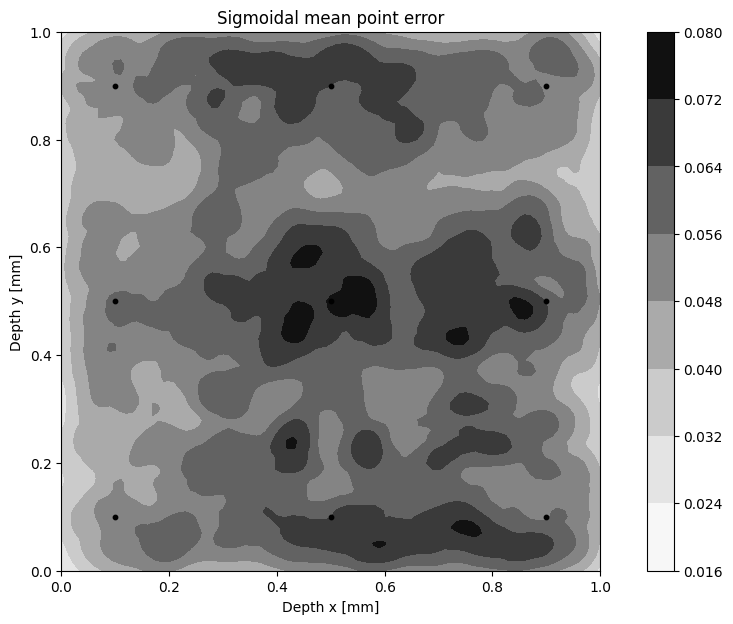

In [61]:
mask = vmap.plot_error_map(point_error, ele_pos)

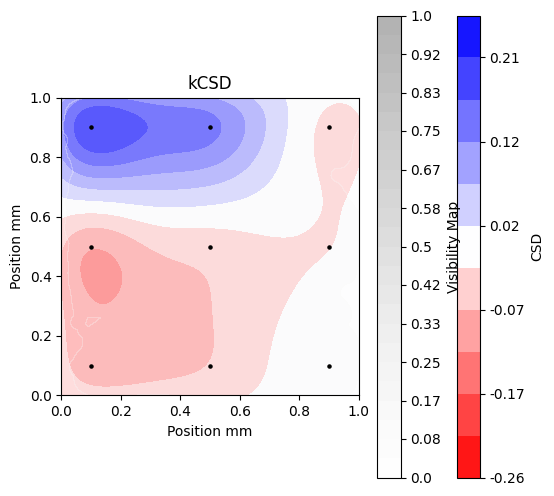

In [62]:
plots.show_csd(obj.estm_pos, est_csd, show_ele=ele_pos, show_kcsd=True, show_mask=mask)

### Choose how many electrodes are broken

In [63]:
nr_broken_ele

BoundedIntText(value=5, description='Select number of broken electrodes:', max=9, min=1)

In [64]:
ele_pos_br = vmap.generate_electrodes(total_ele=nr_ele_select.value, ele_lims=[0.1, 0.9],
                                      nr_broken_ele=nr_broken_ele.value)

In [65]:
rms_br, point_error_br = vmap.calculate_error_map(config.csd_profile,
                                                  n=100, Rs=np.arange(0.2, 0.5, 0.1),
                                                  nr_broken_ele=nr_broken_ele.value, method=regularization_select.value)

Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrode

No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, us

min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
ma

min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.3
min lambda 0.001
max lambda 0.0049
l-curve (all lambda):  0.4
Best lambda and R =  0.0019669423890481983 ,  0.2
Number of electrodes: 4
No lambda given, using defaults
min lambda 0.001
max lambda 0.0051
min lambda 0.001
max lambda 0.0051
l-curve (all lambda):  0.2
min lambda 0.001
ma

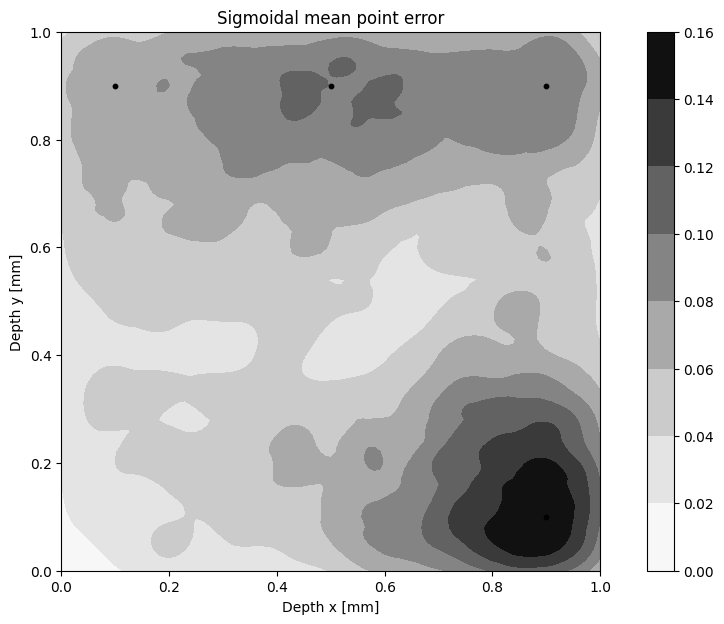

In [66]:
mask_br = vmap.plot_error_map(point_error_br, ele_pos_br)